In [1]:
import numpy as np
np.random.seed(42)

In [2]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, f1_score, recall_score, precision_score, confusion_matrix
import time

## Dataset Description
In the datasets, the features are the vibration measurements in columns A, B, ... , H, which correspond to (X1, X2, ... , X8) measurement signals. Each feature represents a vibration signal inside the furnace at several frequency bands. Each example is a measurement recorded at a time instance (Timestamp), which are considered time-series data measurements.

## Data Preparations

A) Read "normal.csv" as a pandas dataframe "normalData", and print out the shape of the normal dataset.

B) Read "anomalous.csv" as a pandas dataframe "anomalousData", and print out the shape of the nomalous dataset.


In [3]:
normalData = pd.read_csv('normal.csv')
print(normalData.shape)

(76593, 10)


In [4]:
anomalousData = pd.read_csv('anomalous.csv')
print(anomalousData.shape)

(2599, 10)


## Supervised Learning Algorithms

A) Complete the myTrainTestSplit function, which takes as input **two dataframes** consisting of the normal and anomalous datasets, reserves 30 percent of each dataframe for testing and **returns 4 variables, Xtrain, Xtest, ytrain, and ytest**. 

*Note: you can use `concat` from pandas library to concatenade trainig sets from two dataframes, and test sets from two dataframes.*


B) Apply a Decision Tree model for classifying the events as normal or anomalous. Fill in the myDecisionTree function, which accepts as input the training set and returns a fully trained model. 

C) Apply a Bagging model that consists of 10 base decision trees for classifying the events as normal or anomalous. Fill in the myBagging function, which accepts as input the training set and returns a fully trained model. 

D) Apply a Random Forest model that consists of 10 base decision trees for classifying the events as normal or anomalous. Fill in the myRandomForest function, which accepts as input the training set and returns a fully trained model. 

E) Based on the trained Random Forest model from 2D, use a horizontal bar plot to plot the feature importance scores of all features (Timestamp, X1-X8).

F) Fill in the myEvaluateSupervisedModelPerformance function, which takes as input the training and test sets. Please note, you will need to call your functions from 2B, 2C, and 2D within this function to train your models. 
- Calculate the training time for comparing models. 
- Evaluate the performance of your models using 3 metrics of `Recall`, `Preceision` and `f1 score`. Return three numpy arrays consisting of the three metrics calculated for each model on the test set and print them out. 
- Also, print out the confusion matrix of your three models on the test set. 


In [5]:
def myTrainTestSplit(normalData, anomalousData):
    Xn = normalData.iloc[:, :9]
    yn = normalData['Anomaly_Tag']
    yn = yn.astype(int)
    Xtrain_N, Xtest_N, ytrain_N, ytest_N = train_test_split(Xn, yn, test_size=0.30, random_state=42)

    Xa = anomalousData.iloc[:, :9]
    ya = anomalousData['Anomaly_Tag']
    ya = ya.astype(int)
    Xtrain_A, Xtest_A, ytrain_A, ytest_A = train_test_split(Xa, ya, test_size=0.30, random_state=42)

    Xtrain = pd.concat([Xtrain_N,Xtrain_A])
    Xtest = pd.concat([Xtest_N,Xtest_A])
    ytrain = pd.concat([ytrain_N,ytrain_A])
    ytest = pd.concat([ytest_N,ytest_A])
    return Xtrain, Xtest, ytrain, ytest

#Call the function here
Xtrain, Xtest, ytrain, ytest = myTrainTestSplit(normalData, anomalousData)

In [6]:
def myTrainTestSplit(normalData, anomalousData):    
    Data = pd.concat([normalData,anomalousData])
    X = Data.iloc[:, :9]
    y = Data['Anomaly_Tag']
    y = y.astype(int)
    
    Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.30, random_state=42, stratify = y)
    
    return Xtrain, Xtest, ytrain, ytest

#Call the function here
Xtrain, Xtest, ytrain, ytest = myTrainTestSplit(normalData, anomalousData)

In [7]:
print(ytrain.value_counts())
print(ytest.value_counts())

0    53615
1     1819
Name: Anomaly_Tag, dtype: int64
0    22978
1      780
Name: Anomaly_Tag, dtype: int64


In [8]:
### Q2B) - 5pts
def myDecisionTree(Xtrain, ytrain):
    myDecisionTreeModel = DecisionTreeClassifier(random_state=42)
    myDecisionTreeModel.fit(Xtrain, ytrain)
    return myDecisionTreeModel

In [9]:
### Q2C) - 5pts
def myBagging(Xtrain, ytrain):
    myBaggingModel = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=10, random_state=42)
    myBaggingModel.fit(Xtrain, ytrain)
    return myBaggingModel

In [10]:
### Q2D) - 5pts
def myRandomForest(Xtrain, ytrain):
    myRandomForestModel = RandomForestClassifier(n_estimators=10, random_state=42)
    myRandomForestModel.fit(Xtrain, ytrain)
    return myRandomForestModel

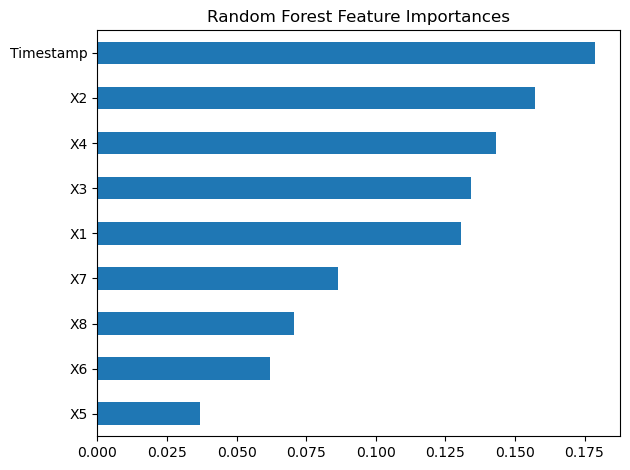

In [11]:
### Q2E) - 10pts
def myRandomForestFeatureImportance(myRandomForestModel):
    feature_names = Xtrain.columns
    f_importances = pd.Series(
        myRandomForestModel.feature_importances_, index=feature_names
    ).sort_values()
    ax = f_importances.plot.barh()
    ax.set_title("Random Forest Feature Importances")
    ax.figure.tight_layout()

#Call the function here
myRandomForestModel = myRandomForest(Xtrain, ytrain)
myRandomForestFeatureImportance(myRandomForestModel)

In [12]:
def myEvaluateSupervisedModelPerformance(Xtrain, Xtest, ytrain, ytest):
    t1 = time.time()
    myDecisionTreeModel = myDecisionTree(Xtrain, ytrain)
    t2 = time.time()
    myBaggingModel = myBagging(Xtrain, ytrain)
    t3 = time.time()
    myRandomForestModel = myRandomForest(Xtrain, ytrain)
    t4 = time.time()
    print("Training time of Decision Tree: "+str(t2-t1)+" s")
    print("Training time of Bagging: "+str(t3-t2)+" s")
    print("Training time of Random Forest: "+str(t4-t3)+" s")

    ypred_DT = myDecisionTreeModel.predict(Xtest)
    ypred_Bagging = myBaggingModel.predict(Xtest)    
    ypred_RF = myRandomForestModel.predict(Xtest)

    DT_Results = np.array([('recall', recall_score(ytest, ypred_DT)),('precision', precision_score(ytest, ypred_DT)),('f1', f1_score(ytest, ypred_DT))])    
    Bagging_Results = np.array([('recall', recall_score(ytest, ypred_Bagging)),('precision', precision_score(ytest, ypred_Bagging)),('f1', f1_score(ytest, ypred_Bagging))])
    RF_Results = np.array([('recall', recall_score(ytest, ypred_RF)),('precision', precision_score(ytest, ypred_RF)),('f1', f1_score(ytest, ypred_RF))])

    DT_cm = confusion_matrix(ytest, ypred_DT)
    Bagging_cm = confusion_matrix(ytest, ypred_Bagging)
    RF_cm = confusion_matrix(ytest, ypred_RF)

    print("ConfusionMatrix of Decision Tree:")
    print(DT_cm)    
    print("ConfusionMatrix of Bagging:")
    print(Bagging_cm)    
    print("ConfusionMatrix of Random Forest:")
    print(RF_cm)
    
    return DT_Results, Bagging_Results, RF_Results

#Call the function here
DT_Results, Bagging_Results, RF_Results = myEvaluateSupervisedModelPerformance(Xtrain, Xtest, ytrain, ytest)
print("Metrics of Decision Tree:")
print(DT_Results)
print("Metrics of Bagging:")
print(Bagging_Results)
print("Metrics of Random Forest:")
print(RF_Results)

C:\Users\Piran\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Training time of Decision Tree: 1.1884584426879883 s
Training time of Bagging: 8.275821924209595 s
Training time of Random Forest: 3.589637041091919 s
ConfusionMatrix of Decision Tree:
[[22925    53]
 [   77   703]]
ConfusionMatrix of Bagging:
[[22958    20]
 [   88   692]]
ConfusionMatrix of Random Forest:
[[22967    11]
 [   93   687]]
Metrics of Decision Tree:
[['recall' '0.9012820512820513']
 ['precision' '0.9298941798941799']
 ['f1' '0.9153645833333334']]
Metrics of Bagging:
[['recall' '0.8871794871794871']
 ['precision' '0.9719101123595506']
 ['f1' '0.9276139410187667']]
Metrics of Random Forest:
[['recall' '0.8807692307692307']
 ['precision' '0.9842406876790831']
 ['f1' '0.9296346414073071']]


## Section 2
### Part 1
The metrics chosen are commonly used to evaluate anomaly detection models as they give an indicator about how confident we should be when it comes to distinguishing anomalies.
*   Recall helps identify the proportion of true anomalies that were correctly classified (TP) out of all actual anomalies (TP+FN).
*   Precision identifies the proportion of correctly classified anomalies (TP) out of all predicted anomalies (TP+FP)
*   F1 score combines the previous metrics using harmonic mean, and it serves as a good indicator for the performance especially in case of imbalanced data (as opposed to accuracy), which is the case here.

### Part 2
The performance of the Bagging model is better than the Decision Tree model, but the training time of the Bagging model is much higher.   
This is because the Bagging model consisting of 10 decision trees has better generalization ability than a single Decision Tree. Additionally, the bagging ensemble strategy has reduced the variance of single Decision Trees. However, bagging is an ensemble model that consists of multiple decision trees and has much higher computational complexity.


### Part 3
The performance of the Random Forest model is similar to the Bagging model, but the training time of the Random Forest model is much lower.   
This is because the Random Forest model uses random subsets of the features to build each base tree, while the Bagging model use all the features to build base trees. Although using random feature subsets can reduce correlations of trees, it may also slightly reduce the overall performance, as certain information may be lost by only selecting a subset of features. On the other hand, using random feature subsets to build base trees can greatly reduce the model complexity and training time. Overall, both Bagging and Random Forest use the bagging ensemble strategy to build base decision trees, so their performances are often similar.


## Dimensionality Reduction

A) Build the pipeline that uses a Principal Component Analysis (PCA) model to extract 2 principal components of the training set and create a a Random Forest model that consists of 50 base decision trees (same as the model in 2D).  Fill in the myPCARF function, which accepts as input the training set and returns a fully trained model. 

B) Fill in the myEvaluateUnsupervisedModelPerformance function, which takes as input the training and test sets. Please note, you will need to call your functions from 3A within this function to train your models. 
- Calculate the training time for comparing models. 
- Evaluate the performance of your model on the test set using the 3 same metrics from 2F. Return three numpy arrays consisting of the three metrics calculated for the model and print them out. 
- Also, print out the confusion matrix of your model on the test set. 

*Note: This function can be the same as the function from 2F, but remember to change the model name.*


In [13]:
def myPCARF(Xtrain, ytrain):
    myPCARFModel = Pipeline([
    ('pca', PCA(n_components=2, random_state=42)),
    ('random_forest', RandomForestClassifier(n_estimators=50, random_state=42))
  ])
    myPCARFModel.fit(Xtrain, ytrain)
    return myPCARFModel

In [14]:
def myEvaluateUnsupervisedModelPerformance(Xtrain, Xtest, ytrain, ytest):
    t1 = time.time()
    myPCARFModel = myPCARF(Xtrain, ytrain)
    t2 = time.time()
    print("Training time of PCA + Random Forest: "+str(t2-t1)+" s")

    ypred_PCARF = myPCARFModel.predict(Xtest)
 
    PCARF_Results = np.array([('recall', recall_score(ytest, ypred_PCARF)),('precision', precision_score(ytest, ypred_PCARF)),('f1', f1_score(ytest, ypred_PCARF))])
  
    PCARF_cm = confusion_matrix(ytest, ypred_PCARF)

    print("ConfusionMatrix of PCA + Random Forest:")
    print(PCARF_cm)
    
    return PCARF_Results

#Call the function here
PCARF_Results = myEvaluateUnsupervisedModelPerformance(Xtrain, Xtest, ytrain, ytest)
print("Metrics of PCA + Random Forest:")
print(PCARF_Results)

Training time of PCA + Random Forest: 8.676892757415771 s
ConfusionMatrix of PCA + Random Forest:
[[22841   137]
 [  417   363]]
Metrics of PCA + Random Forest:
[['recall' '0.4653846153846154']
 ['precision' '0.726']
 ['f1' '0.5671875']]


The performance of the PCA + Random Forest model is worse than the Random Forest model itself, because the PCA only uses the generated two principal components to train the Random Forest model, while the Random Forest model itself uses all the features. On the other hand, the training time and model complexity has to be decreased by the PCA model, because the dimensionality of the data has been reduced by PCA. However, here we build a Random Forest model that consists of 50 decision trees, so its training time is higher than the model from 2D. The number of principal components can be tuned as a hyperparameter to better balance the model complexity and performance.  